In [126]:

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math 

##load the staypoints file
staypts_df = pd.read_csv('C:/Users/shr7abt/Documents/Location/Data/StayPointsUser17(octnov2008)', sep='\t')

#delete all non-staypoints
staypts_df = staypts_df.loc[staypts_df['StayPoint'] == 1]

#make index as datetime
staypts_df.index = pd.to_datetime(staypts_df.Timestamp)
staypts_df.head()


Timestamp   Latitude   Longitude    0  \
Timestamp                                                              
2008-10-30 09:54:00  2008-10-30 09:54:00  40.015220  116.338636  0.0   
2008-10-30 09:56:00  2008-10-30 09:56:00  40.015405  116.338133  0.0   
2008-10-30 09:58:00  2008-10-30 09:58:00  40.015582  116.338158  0.0   
2008-10-30 10:00:00  2008-10-30 10:00:00  40.015323  116.338242  0.0   
2008-10-30 10:02:00  2008-10-30 10:02:00  40.015034  116.338404  0.0   

                       Altitude       NumDays  ClusterId  ClusterMeanLat  \
Timestamp                                                                  
2008-10-30 09:54:00  117.084615  39751.413036       14.0       40.015292   
2008-10-30 09:56:00  114.800000  39751.414217       14.0       40.015292   
2008-10-30 09:58:00  114.800000  39751.415926       14.0       40.015292   
2008-10-30 10:00:00  114.800000  39751.418015       14.0       40.015292   
2008-10-30 10:02:00  111.500000  39751.418385       14.0       40.015292   

                     ClusterMeanLon  StayPoint  SignificantPlace  \
Timestamp                                                          
2008-10-30 09:54:00      116.338404        1.0              -1.0   
2008-10-30 09:56:00      116.338404        1.0              -1.0   
2008-10-30 09:58:00      116.338404        1.0              -1.0   
2008-10-30 10:00:00      116.338404        1.0              -1.0   
2008-10-30 10:02:00      116.338404        1.0              -1.0   

                             Timestamp.1  
Timestamp                                 
2008-10-30 09:54:00  2008-10-30 09:54:00  
2008-10-30 09:56:00  2008-10-30 09:56:00  
2008-10-30 09:58:00  2008-10-30 09:58:00  
2008-10-30 10:00:00  2008-10-30 10:00:00  
2008-10-30 10:02:00  2008-10-30 10:02:00

In [127]:
#add a column hour for pivot table
staypts_df['Hour'] = staypts_df.index.hour

#sort based on hours
staypts_df = staypts_df.sort_values(['Hour'])

#count a cluster existence in each hour of te day
pivot_df_count = staypts_df.pivot_table(values='Latitude', index='ClusterId',columns='Hour',aggfunc=len,  fill_value=0)

pivot_df_count.head()

Hour       0   1   2   3   4   5   6   7   8   9  ...  12  13  14  15  16  17  \
ClusterId                                         ...                           
14.0        0   0   0   0   0   0   0   0   0   3 ...   0   0   0   0   0   0   
31.0        0   0   0   0   0   0   0   0   0   0 ...  15   0   0   0   0   0   
125.0       0   0   0   0   0   0   0   0   4   0 ...   0   0   0   0   0   0   
141.0       0   0   0   0   0   0   1   1   0   0 ...   0   0   0   0   0   0   
145.0       0   0   0   0   0   0   0   0   1   0 ...   0   0   0   0   0   0   

Hour       18  19  20  23  
ClusterId                  
14.0        0   0   0   0  
31.0        0   0   0   0  
125.0       0   0   0   0  
141.0       0   0   0   0  
145.0       0   0   0   1  

[5 rows x 22 columns]

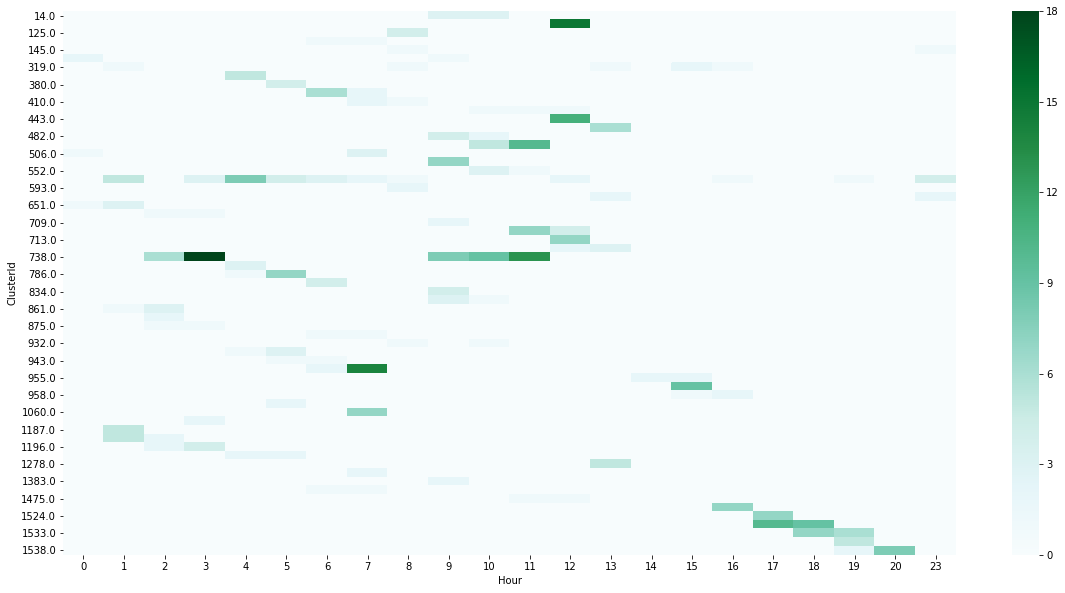

In [128]:
#visualize the staypoint counts per hour
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(pivot_df_count, cmap='BuGn', ax=ax)

In [129]:
#copy count pivot to a new pivot where percentage weight of each staypount in the hour is calculated
pivot_df_count.columns.name = None
pivot_df_weight = pivot_df_count.copy()

for column in pivot_df_weight:
    pivot_df_weight[column] = round(pivot_df_weight[column] / pivot_df_weight[column].sum() * 100, 2)
pivot_df_weight.head()


0    1    2    3    4    5     6     7      8     9   ...    \
ClusterId                                                         ...     
14.0       0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00   0.00  8.82  ...     
31.0       0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00   0.00  0.00  ...     
125.0      0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  36.36  0.00  ...     
141.0      0.0  0.0  0.0  0.0  0.0  0.0  5.26  2.86   0.00  0.00  ...     
145.0      0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00   9.09  0.00  ...     

              12   13   14   15   16   17   18   19   20     23  
ClusterId                                                        
14.0        0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  
31.0       34.88  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  
125.0       0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  
141.0       0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  
145.0       0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  14.29  

[5 rows x 22 columns]

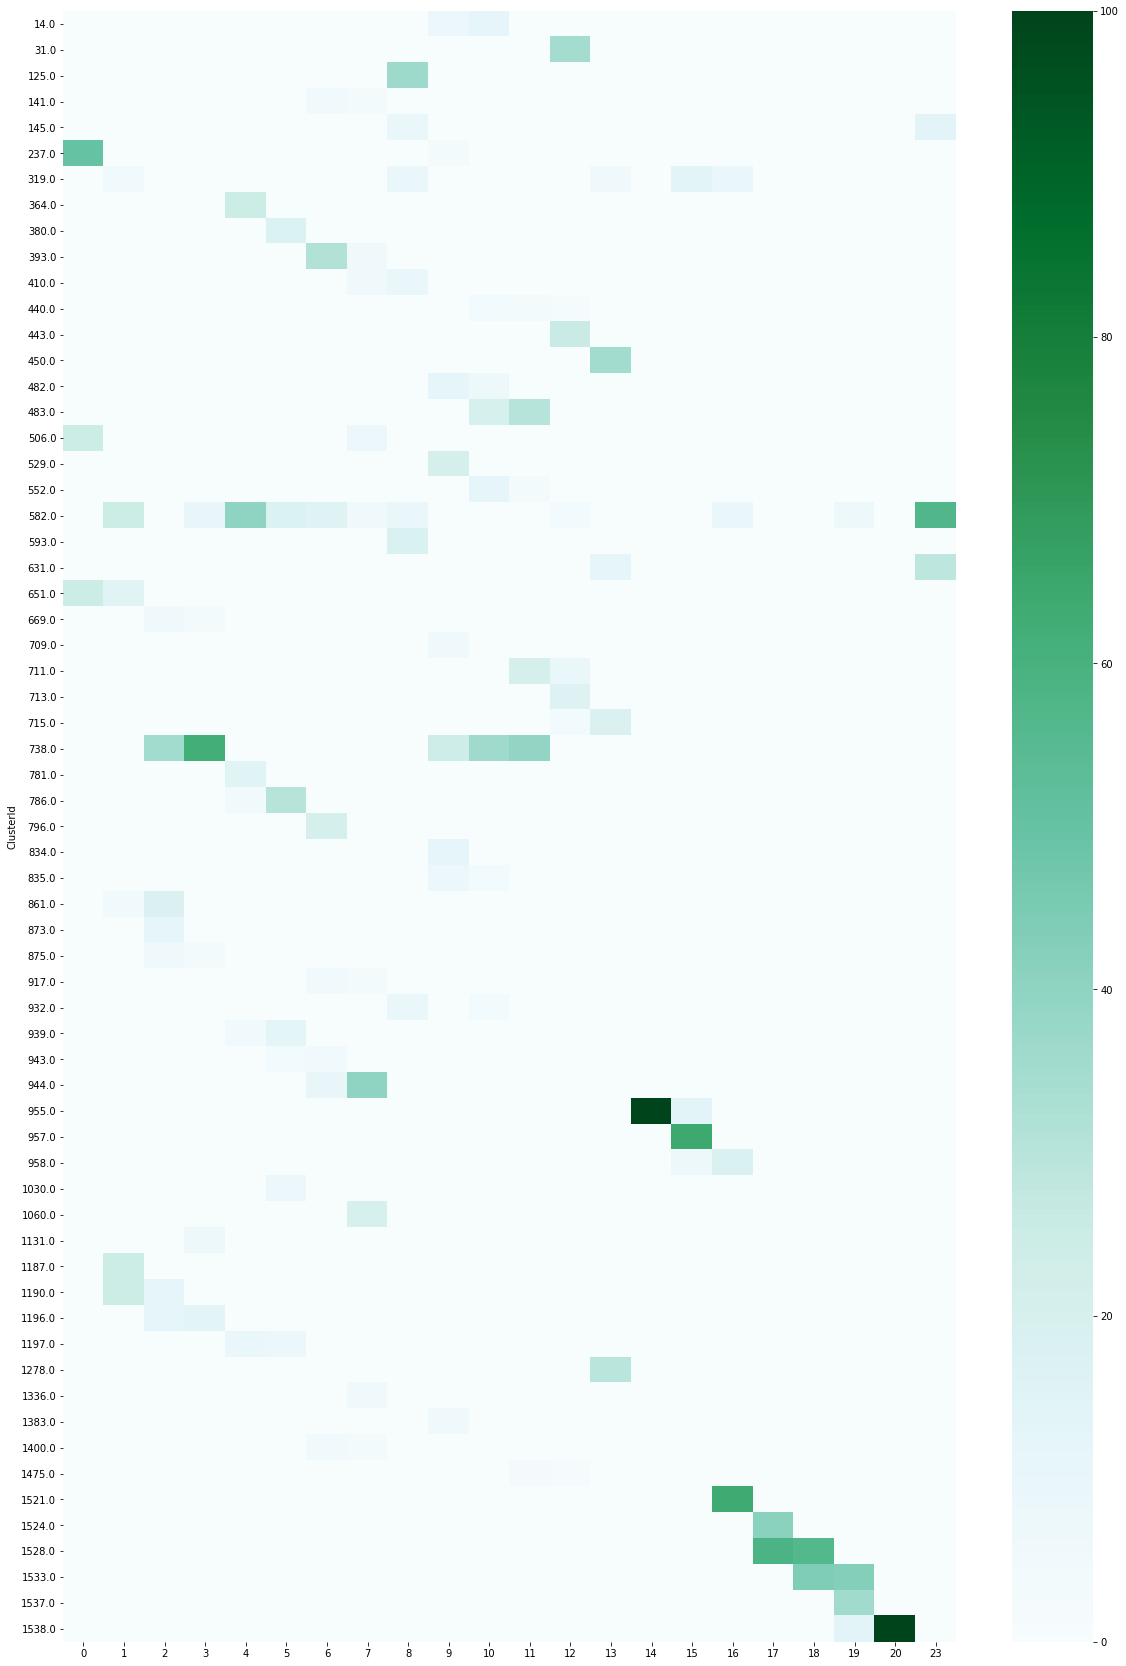

In [132]:
#visualize the staypoint percentage weight per hour
fig, ax = plt.subplots(figsize=(20,30)) 
sns.heatmap(pivot_df_weight, cmap='BuGn', ax=ax)